# Hypothesis Testing on Hotel Reservation Data

So far, the notebook `topic_1.ipynb` conducted an exploratory data analysis. However, I saw that the hypothesis testing part to make recommendation for the hotel is not "statistically significant". In other words, some of them were not tested using a statistical test probably.

In this notebook, I will process clearly on the test and review a bit about the theoretical background of every test I preferred.

## Research Questions

1. The chance of a booking from a first-time customer being cancelled is higher than repeated customer.
2. The average revenue comes from repeated customer is higher than first-time customer.
3. Higher number of week/weekend nights leads to high risk of being cancelled.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
df = pd.read_csv('Hotel Reservations.csv', index_col='Booking_ID')
df = df.drop_duplicates()
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, INN00001 to INN36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_seg

## RQ1: The chance of a booking from a first-time customer being cancelled is higher than repeated customer.

$X$: Is repeated customer? (Y/N) -> categorical variable

$Y$: Is the booking cancelled? (Y/N) -> categorical variable

**Chi-square test for independence** is adaptable for this research question, since it deals with $X$ and $Y$ both categorical variables.

**Assumptions for chi-square test:**
- Observations are independent.
- Cells in the contingency table are mutually exclusive.

Note that chi-square test is a non-parametric approach.


**Null vs alternative hypotheis**

$H_0$ (null hypothesis): The occurance of repeating customer and the occurance of cancelled booking are independent. In other words, $P(A,B) = P(A)P(B)$

$H_a$ (alternative hypothesis): The occurance of repeating customer does have a relationship with the occurance of cancelled booking.

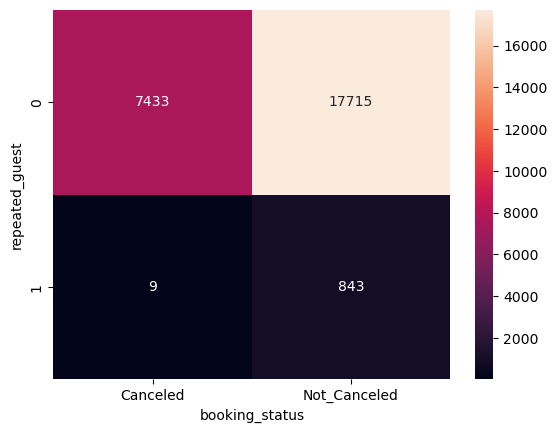

In [19]:
repeated_cancelled_crosstab = pd.crosstab(df['repeated_guest'], df['booking_status'])
sns.heatmap(repeated_cancelled_crosstab, annot=True, fmt='g')
plt.show()

In [20]:
statistic, pvalue, dof, expected_freq = scipy.stats.chi2_contingency(repeated_cancelled_crosstab)
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print("Degree of freedom:", dof)
print("Expected frequency:\n", expected_freq)
print("-"*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis and state that there is a relationship between X and Y.")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: 326.25341777309166
p-value: 6.292335904113769e-73
Degree of freedom: 1
Expected frequency:
 [[ 7198.13138462 17949.86861538]
 [  243.86861538   608.13138462]]
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis and state that there is a relationship between X and Y.


From the chi-square test of independence, we state the there is a relationship between `repeated_guest` and `booking_status` *under the assumption*.

## RQ2: The average revenue comes from repeated customer is higher than first-time customer.

$X$: Is repeated customer? (Y/N) -> categorical variable

$Y$: Revenue -> numerical-continuous variable

Since we have enough samples, a parametric approach, such as **two sample t-test**, is adaptable for this research question. However, since $n = 26000$, **z-test** is also probable.

**Assumptions for t-test**:
- Simple random sample (the sample is the representative of the population).
- Observations are independent.
- Observations between groups are independent.
- Large sample size.
- Data between 2 groups are normally distributed.
- Equal or non-equal variance check.

*Additional assumptions*:
- Since we don't know for repeated customer, which exact booking the customer made for the first time in the dataset. Therefore, we assume that first-time records for repeated customer do not exist in our data.
- Only successful booking will be taken into account, because if canceled booking is added, the revenue is no longer normally distributed. For this reason, later on, we will add a non-parametric approach which take into account both types of booking.

**Null vs alternative hypothesis**:

$H_0$ (null hypothesis): There is no difference between the revenue made by repeated customer and first-time customer.

$H_a$ (alternative hypothesis): Revenue made by repeated customer **is higher than** first-time customer.

In [27]:
df['revenue'] = (df['avg_price_per_room'] * (df['no_of_week_nights'] + df['no_of_weekend_nights'] * 1.2) * \
                 (df['no_of_adults'] + df['no_of_children'] * 0.8)) * (df['booking_status'] == 'Not_Canceled')
df['revenue']

Booking_ID
INN00001     416.000
INN00002    1152.144
INN00003       0.000
INN00004       0.000
INN00005       0.000
              ...   
INN36270       0.000
INN36271    4228.560
INN36272       0.000
INN36273    1652.952
INN36274       0.000
Name: revenue, Length: 26000, dtype: float64

In [30]:
df_successful_booking = df[df['booking_status'] == 'Not_Canceled']
df_successful_booking.shape

(18558, 19)

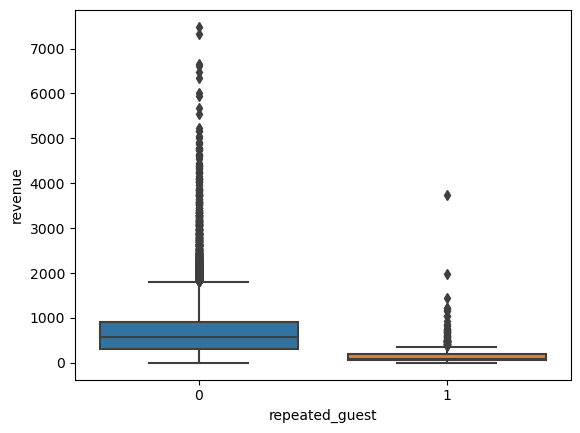

In [33]:
sns.boxplot(data=df_successful_booking, x="repeated_guest", y="revenue")
plt.show()

We may see from the boxplot that first-time guest spend a higher cost than repeated guest. Therefore, our alternative hypothesis might need something reversed. We will do it later then.

<AxesSubplot:xlabel='revenue', ylabel='Count'>

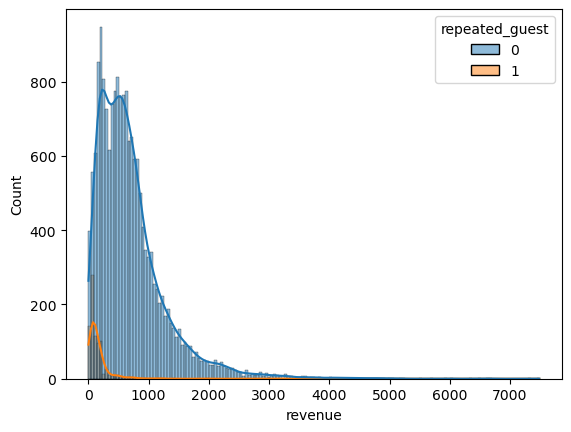

In [34]:
sns.histplot(data=df_successful_booking, x="revenue", hue="repeated_guest", kde=True)

In [43]:
# Calculate the variance between 2 groups
a = df_successful_booking[df_successful_booking["repeated_guest"] == 1]["revenue"]
b = df_successful_booking[df_successful_booking["repeated_guest"] == 0]["revenue"]

print("The 2 standard deviation are:", a.std(), b.std())
if a.std() / b.std() > 2 or a.std() / b.std() < 0.5:
    print("Assume non-equal variance")
else:
    print("Assume equal variance")

The 2 standard deviation are: 219.16335689677354 598.1987136729856
Assume non-equal variance


In [47]:
# H_a: Revenue made by repeated customer is higher than first-time customer.
statistic, pvalue = scipy.stats.ttest_ind(a, b, equal_var=True, alternative='greater')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis.")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: -26.55846980381549
p-value: 1.0
--------------------------------------------------
With p-value > alpha, we failed to reject the null hypothesis.


In [48]:
# H_a: Revenue made by repeated customer is less than first-time customer.
statistic, pvalue = scipy.stats.ttest_ind(a, b, equal_var=True, alternative='less')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: -26.55846980381549
p-value: 7.214668706500087e-153
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis


**Non-parametric versions with Rank Sum and Mann Whitney U**

For non-parametric versions, we don't need to elimiate the set of canceled reservations.

In [51]:
# Calculate the variance between 2 groups
a = df[df["repeated_guest"] == 1]["revenue"]
b = df[df["repeated_guest"] == 0]["revenue"]

In [52]:
statistic, pvalue = scipy.stats.mannwhitneyu(a, b, alternative='less')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: 7473275.5
p-value: 7.973845229467048e-53
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis


In [53]:
statistic, pvalue = scipy.stats.ranksums(a, b, alternative='less')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: -15.036217142136161
p-value: 2.125806550756566e-51
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis


From all the tests, we conclude that the revenue made by first-time customer is greatly higher than repeated customer, which is contrast to our conclusion in the previous notebook.

## RQ3: Higher number of week/weekend nights leads to higher risk of being cancelled.

$X$: Number of week nights ($X_1$) and number of weekends nights ($X_2$) -> numerical variable.

$Y$: Is booking cancelled? -> categorical variable.

For this case, we try to perform 2 strategies:
- Do 2 **Mann-Whitney U test** to check whether there is a relationship between number of week nights to booking cancellation and whether there is a relationship between number of weekday nights to booking cancellation.
- Map $X$ to $Y$ using **logistic regression**.

**Assumptions for logistic regression**:
- Simple random sample.
- Observations are independent.
- There to be little or no multicollinearity among the independent variables.
- Linearity of independent variables and log odds.
- Large sample size.

**Null vs alternative hypothesis**:

$H_0$ (null hypothesis): There is no relationship between $X$'s and $Y$.

$H_a$ (alternative hypothesis): There is a relationship between $X$'s and $Y$.

**Mann-Whitney U Test**

In [72]:
# Test for number of week nights
a = df[df["booking_status"] == "Not_Canceled"]["no_of_week_nights"]
b = df[df["booking_status"] == "Canceled"]["no_of_week_nights"]

statistic, pvalue = scipy.stats.mannwhitneyu(a, b, alternative='less')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: 59717372.5
p-value: 3.8784688161840694e-69
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis


In [73]:
# Test for number of week nights
a = df[df["booking_status"] == "Not_Canceled"]["no_of_weekend_nights"]
b = df[df["booking_status"] == "Canceled"]["no_of_weekend_nights"]

statistic, pvalue = scipy.stats.mannwhitneyu(a, b, alternative='less')
alpha = 0.05

print("Test statistic:", statistic)
print("p-value:", pvalue)
print('-'*50)
if pvalue < alpha:
    print("With p-value < alpha, we reject the null hypothesis")
else:
    print("With p-value > alpha, we failed to reject the null hypothesis.")

Test statistic: 64073713.0
p-value: 1.2824538807302204e-22
--------------------------------------------------
With p-value < alpha, we reject the null hypothesis


We can conclude that both `no_of_week_nights` and `no_of_weekend_nights` have relationships with `booking_status`.

**Logistic Regression**

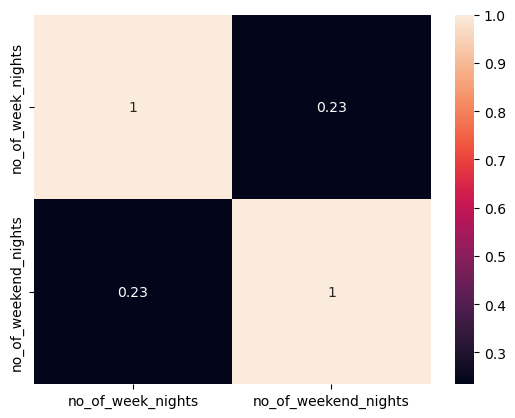

In [75]:
# Check the correlation between 2 independent variables X_1 and X_2
sns.heatmap(df[['no_of_week_nights', 'no_of_weekend_nights']].corr(), annot=True)
plt.show()

From Google quick search, *correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. Correlation coefficients whose magnitude are less than 0.3 have little if any (linear) correlation.* Therefore, we conclude that these 2 variables have a little correlation and can perform logistic regression.

In [76]:
df['is_canceled'] = (df['booking_status'] == 'Canceled').astype('int')
df['is_canceled']

Booking_ID
INN00001    0
INN00002    0
INN00003    1
INN00004    1
INN00005    1
           ..
INN36270    1
INN36271    0
INN36272    1
INN36273    0
INN36274    1
Name: is_canceled, Length: 26000, dtype: int64

In [78]:
import statsmodels.formula.api as smf

model = smf.logit('is_canceled ~ no_of_week_nights + no_of_weekend_nights', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.590133
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                26000
Model:                          Logit   Df Residuals:                    25997
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.01438
Time:                        11:44:56   Log-Likelihood:                -15343.
converged:                       True   LL-Null:                       -15567.
Covariance Type:            nonrobust   LLR p-value:                 6.142e-98
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3901      0.027    -50.953      0.000      -1.444      -1.337

The p-values in both variables are converged to 0, meaning that there is a relationship between the independent variables $X$'s and dependant variable $Y$. However the Pseudo R-squared value is small (0.01438), indicates that logistic regression is not a good fit for $X$ and $Y$.

## Conclusions

**Q1: Is the chance of a booking from a first-time customer being cancelled is higher than repeated customer?**

Yes.

**Q2: Is the average revenue comes from repeated customer is higher than first-time customer.**

No. In fact, it goes the other way that *the average revenue comes from repeated customer is less than first-time customer.*

**Q3: Higher number of week/weekend nights leads to high risk of being cancelled.**

We can claim that the number of week/weekend nights have the relationship with the probability of a booking being cancelled, but we need to find a better model for fitting this because these 2 in Logistic Regression can only explain 1.4% variability of the model.